# Word Embeddings - Learning Curve

In [1]:
# importing packages
import json
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

### Sarcasm data

In [2]:
# reading data
with open("./data/sarcasm.json", 'r') as f:
    data = json.load(f)
    
sentences = []
labels = []

for item in data:
    sentences.append(item["headline"])
    labels.append(item["is_sarcastic"])

In [3]:
# checking sentences
sentences[:2]

["former versace store clerk sues over secret 'black code' for minority shoppers",
 "the 'roseanne' revival catches up to our thorny political mood, for better and worse"]

In [4]:
# checking labels
labels[:2]

[0, 0]

### Train/Test Split

In [5]:
# getting len of sentences
len(sentences)

26709

In [6]:
# defining training and testing data sets
data_size = 20000
training_sentences = sentences[0:data_size]
testing_sentences = sentences[data_size:]
training_labels = np.array(labels[0:data_size])
testing_labels = np.array(labels[data_size:])

### Hyperparameters

In [7]:
# modifying the hyperparameters for tuning the model
vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = "post"
padding_type = "post"
oov_token = "<oov>"

### Tokenize

Individual linguistic units.

In [8]:
# tokenizing data
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(training_sentences)
word_index = tokenizer.word_index

# converting words to numbers and pad for the neural network to use as input
training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

# tokenized using the word_index learned from the training data
testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, 
                                padding=padding_type, truncating=trunc_type)

### Create the model

In [9]:
# creating model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    #tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(24, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 32, 16)            160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 25        
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [10]:
# training model
history = model.fit(training_padded, training_labels, epochs=3, 
                    validation_data=(testing_padded, testing_labels), verbose=2)

Train on 20000 samples, validate on 6709 samples
Epoch 1/3
20000/20000 - 1s - loss: 0.5618 - accuracy: 0.7039 - val_loss: 0.3987 - val_accuracy: 0.8365
Epoch 2/3
20000/20000 - 1s - loss: 0.3158 - accuracy: 0.8735 - val_loss: 0.3451 - val_accuracy: 0.8532
Epoch 3/3
20000/20000 - 1s - loss: 0.2377 - accuracy: 0.9057 - val_loss: 0.3458 - val_accuracy: 0.8512


### Plot the loss

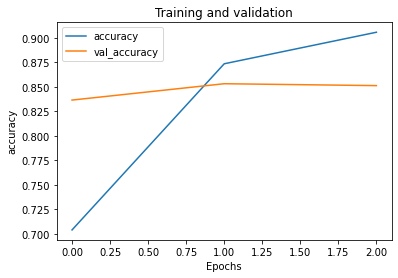

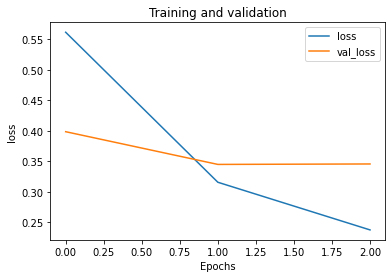

In [11]:
# function to plot
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+ string])
    plt.title('Training and validation')
    plt.xlabel('Epochs')
    plt.ylabel(string)
    plt.legend([string, 'val_'+ string])
    plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")